## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Understanding

In [23]:
#load teh csv data to a pandas dataframe

df=pd.read_csv("HR_comma_sep.csv")

In [24]:
# First 5 rows of the Dataset

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# Last 5 rows of the Dataset

df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


>satisfaction_level : Employee-reported job satisfaction level [0–1]

>last_evaluation : Score of employee's last performance review [0–1]	

>number_project : Number of projects employee contributes to	

>average_monthly_hours : Average number of hours employee worked per month	

>time_spend_company : How long the employee has been with the company (years)

>Work_accident : Whether or not the employee experienced an accident while at work

>left : Whether or not the employee left the company

>promotion_last_5years : Whether or not the employee was promoted in the last 5 years

>Department : The employee's department

>salary : The employee's salary (U.S. dollars)

In [26]:
#number of row and columns

df.shape

(14999, 10)

The dataset contains 14,999 rows and 10 columns.

In [27]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [28]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Thats show you the no missing values in it and what are all the different data types inthe different columns

In [29]:
# Checking the number of missing value in each column

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

* About the data, there are 14,999 non-null objects for all columns, equal to the total number of rows, which means that there are no null values in the dataset. 

In [30]:
# checking the  number  of duplicated values

df.duplicated().sum()

3008

* The dataset contains 3008 duplicated entries

In [31]:
# Generate summary statistics for numerical columns in the DataFrame

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
# Count the occurrences of unique values in the 'left' column

df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

* This Dataset is highly unblanced

## Data Preprocing and EDA

#### Rename Columns

The following columns will be renamed:

* average_montly_hours
* Work_accident
* time_spend_company
* Department

If column names are misspelled or too complex, renaming them to simpler, meaningful names improves clarity.

In [33]:
# Renaming columns for consistency and correctness

df = df.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [34]:
# Randomly select and display 2 rows from the DataFrame

df.sample(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
14977,0.81,0.85,4,251,6,0,1,0,hr,medium
1983,0.43,0.48,2,136,3,0,1,0,RandD,high


#### Remove duplicated value

In [35]:
# Count the number of duplicate rows in the DataFrame

df.duplicated().sum()

3008

In [36]:
# Remove duplicate rows from the DataFrame and update it

df=df.drop_duplicates()

In [37]:
df.duplicated().sum()

0

In [38]:
# Get the number of rows and columns in the DataFrame as a tuple (rows, columns)

df.shape

(11991, 10)

* The dataset contains 11,991 rows and 10 columns.

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking the coutliers 

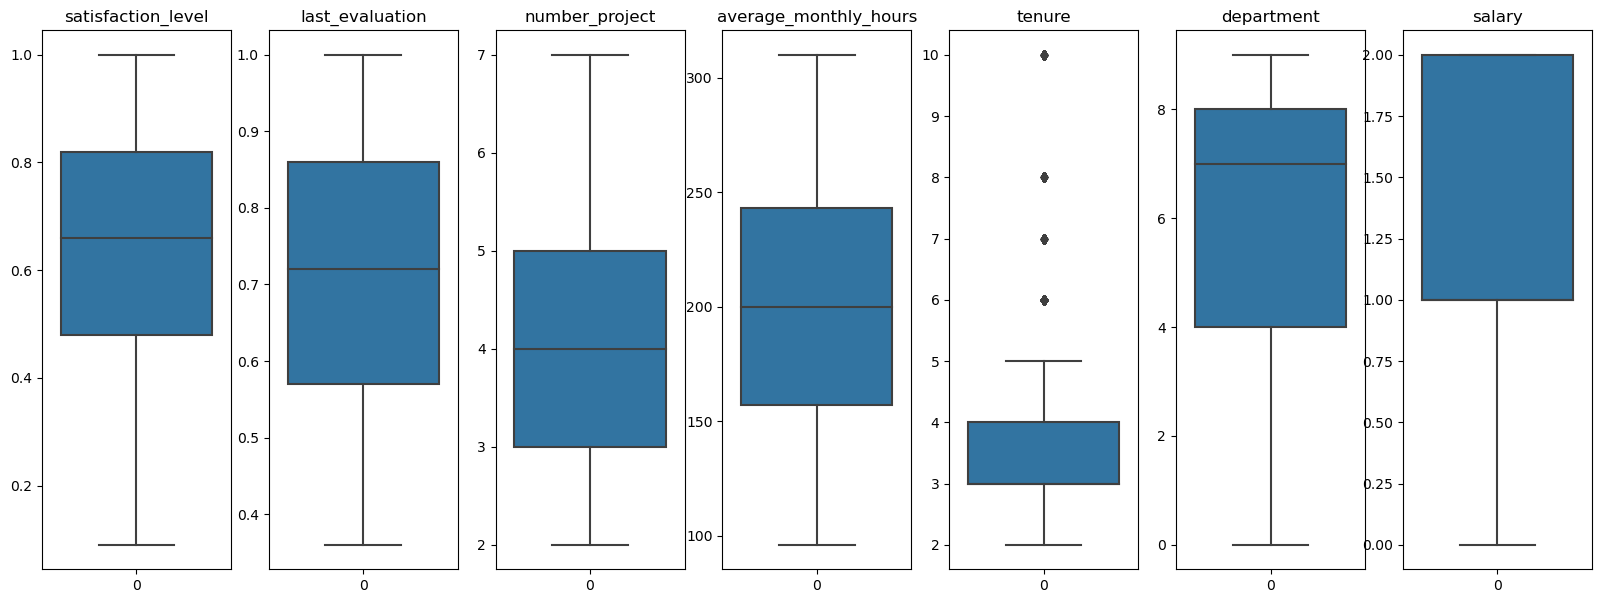

In [93]:
# Define the columns and their corresponding titles
columns =['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure','department', 'salary']

titles =['satisfaction_level', 'last_evaluation', 'number_project','average_monthly_hours', 'tenure','department', 'salary']

# Create a figure with 1 row and 5 columns of subplots
fig, ax = plt.subplots(1, 7, figsize=(20, 7)) 

# Loop through the columns and create boxplots
for i, column in enumerate(columns):
    sns.boxplot(df[column], ax=ax[i])
    ax[i].set_title(titles[i])

"The 'tenure' column is the only column in this dataset with outliers.

### Data Visualization

After data exploration, we will create different plots to investigate the relationship between variables in the HR dataset.

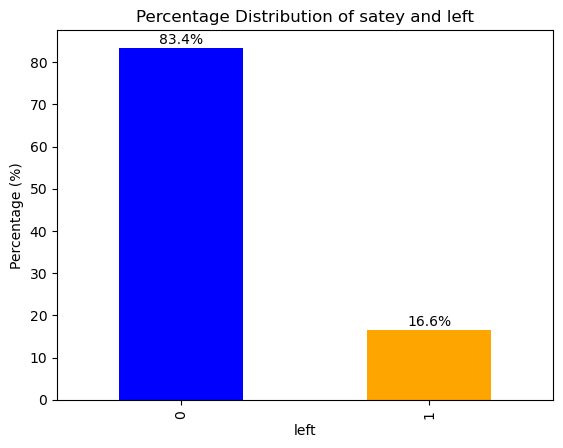

In [41]:
# Value counts and percentage calculation
counts = df['left'].value_counts()
percentages = counts / counts.sum() * 100

# Plot bar chart with percentages
percentages.plot(kind='bar', color=['blue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of satey and left')
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

#### This Dataset is highly unblanced
* 0 ---> Staye
* 1 ---> Left

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

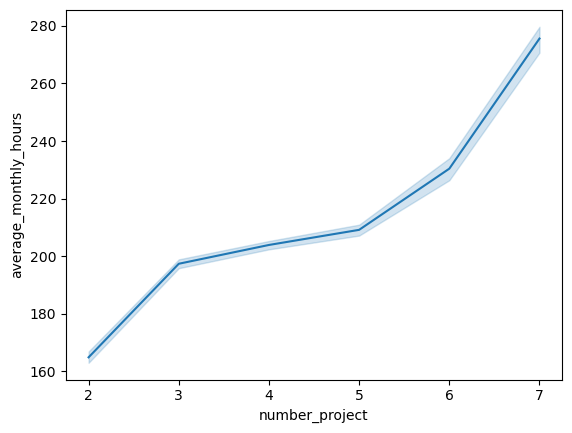

In [42]:
#Relationship between average_monthly_hours and number_project

sns.lineplot(data=df,x='number_project',y='average_monthly_hours')

The plot indicates that the average number of hours worked increases as the number of projects increases, which is expected since employees working on more projects typically work longer hours.

However, a noticeable trend is observed between employees who left and those who stayed.

Employees who left the company tend to work fewer hours than those who stayed, despite handling the same number of projects.

This could suggest that these employees underperformed or were let go. Interestingly, for employees working on four or more projects, those who left the company worked more hours than those who stayed. This might indicate they were overworked. 

Additionally, all employees who worked on seven projects left the company, showing that high productivity could come at the cost of burnout.

---->This suggests that while contributing significantly to the company, overworking employees may lead to higher turnover.

Text(0.5, 0, 'Average Monthly Hours')

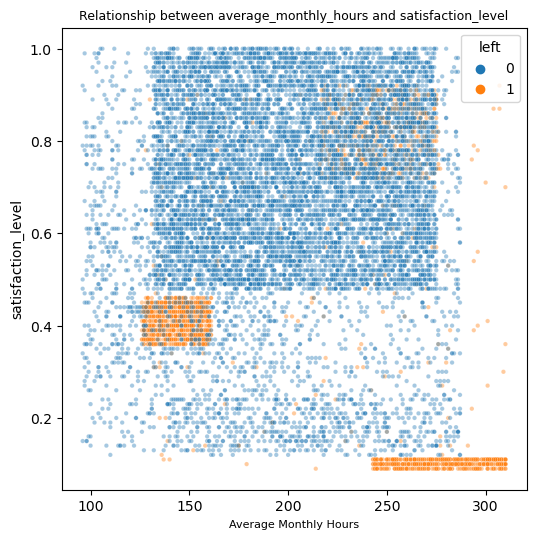

In [43]:
#Relationship between average_monthly_hours and satisfaction_level

plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', color='blue'
                ,hue='left', alpha=0.4, s=10)

# Customize the plot
plt.title("Relationship between average_monthly_hours and satisfaction_level", fontsize=9)
plt.xlabel("Average Monthly Hours", fontsize=8)


* Blue Dots (0): Employees who stayed with the company.
* Orange Dots (1): Employees who left the company.

There is a strong correlation between employees' satisfaction levels and their average monthly hours.

Overworked employees (with high hours and low satisfaction) and underperforming employees (with low hours and low satisfaction) are more likely to leave the company.

--->On the other hand, satisfied employees, regardless of their workload, tend to stay with the company longer.

Text(0, 0.5, 'tenure')

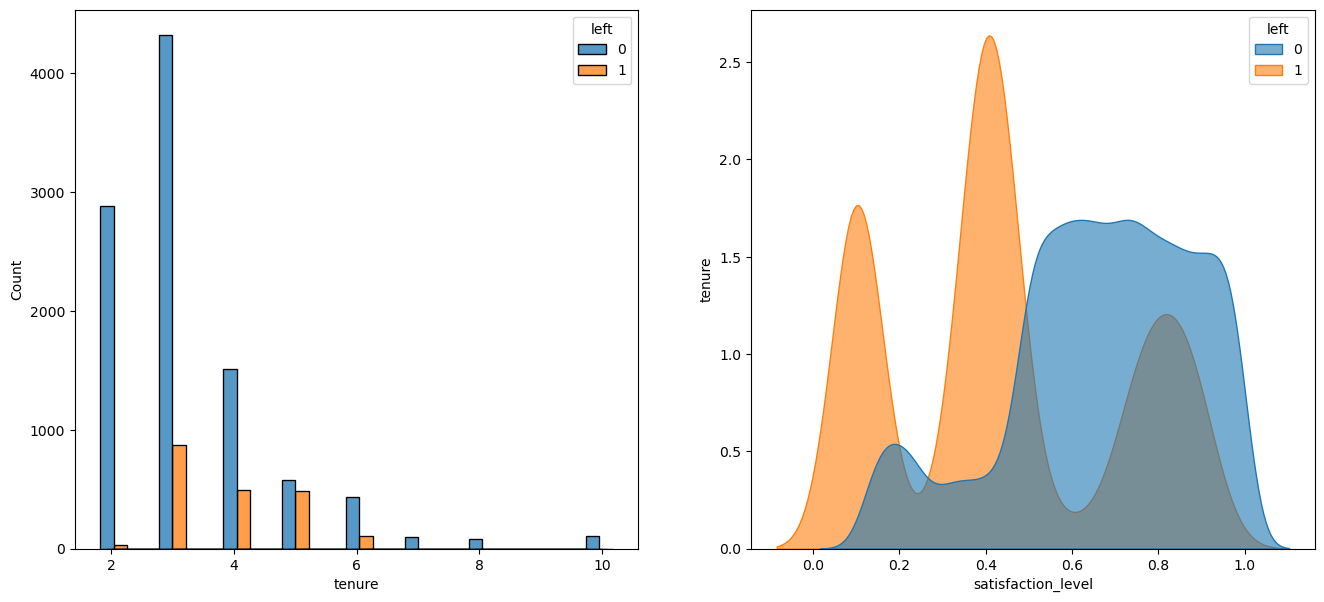

In [44]:
#  Relationship between tenure and satisfaction_level

fig, ax = plt.subplots(1,2, figsize=(16,7))
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[0])
sns.kdeplot(data=df, x='satisfaction_level', hue='left', fill=True, common_norm=False, ax=ax[1], alpha=0.6)
plt.ylabel('tenure')

Most employees with tenure of ≤2 years stayed, while some with tenure between 2-4 years left due to possible dissatisfaction or misfit.

Employees with tenure >6 years rarely leave, which may indicate loyalty or job satisfaction.

Employees with low satisfaction levels (0.3-0.4) are more likely to leave.

Employees with moderate to high satisfaction levels (0.6-0.9) tend to stay with the company.

Almost no employees with very high satisfaction levels (>0.8) left the company, showing a strong correlation between satisfaction and retention.

Text(0.5, 1.0, 'Salary for Employees tenure ')

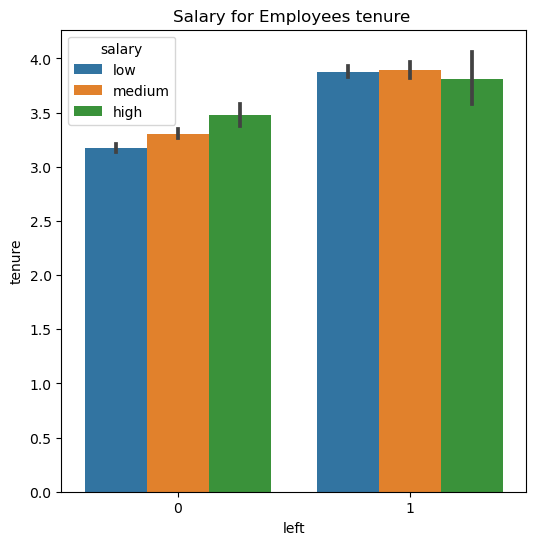

In [45]:
#Tenure Comparison Between Employees left and salary

plt.figure(figsize=(6, 6))
sns.barplot(x=df['left'],y=df['tenure'],hue=df['salary'])
plt.title('Salary for Employees tenure ')

Employees with low salaries are more likely to leave earlier in their tenure, which may indicate dissatisfaction with pay.

Employees with high salaries tend to stay longer, but when they leave, it could be due to reasons unrelated to salary, such as work-life balance or career progression.

The consistent pattern of slightly higher tenure for employees who left could imply that dissatisfaction grows over time for both low and high-salary employees.

If this graph represents your data, further exploration of why long-tenured employees leave could be insightful!

In [46]:
# Inspect the distribution of employees between departments:

print(df['department'].value_counts())

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64


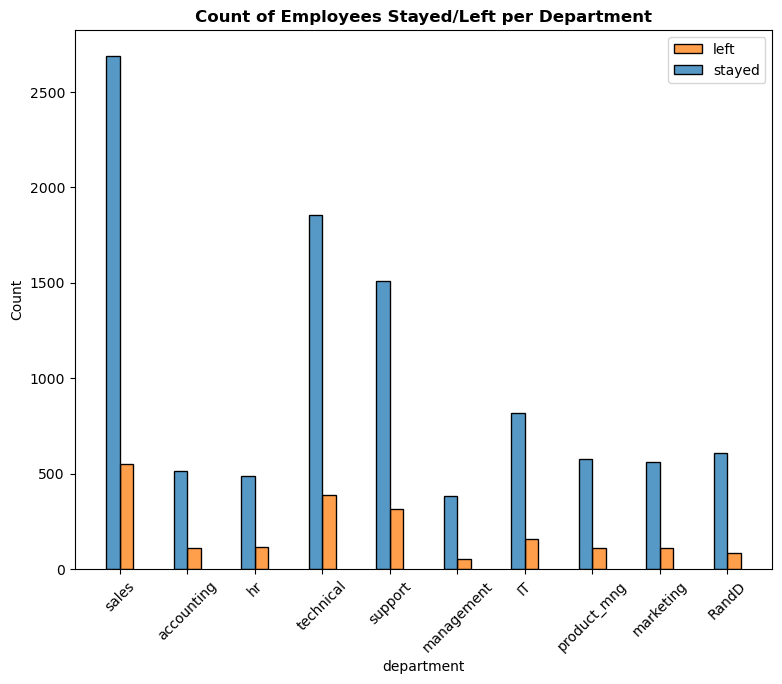

In [47]:
#Plot a histogram to compare the distribution of employees of left and stayed for each department.

plt.subplots(figsize=(9,7))

sns.histplot(data=df, x='department', hue='left', multiple='dodge', shrink=0.4)
plt.legend(labels=['left','stayed'])
plt.xticks(rotation=45, fontsize=10)
plt.title('Count of Employees Stayed/Left per Department',fontweight='bold' )

plt.show()


Based on the histogram above, all departments have a higher number of employees who stayed versus employees who left.

#### LabelEncoder

In [48]:
#from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

# Encode the 'department' and 'salary' columns

df['department'] = le.fit_transform(df['department'])
df['salary'] = le.fit_transform(df['salary'])


In [49]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


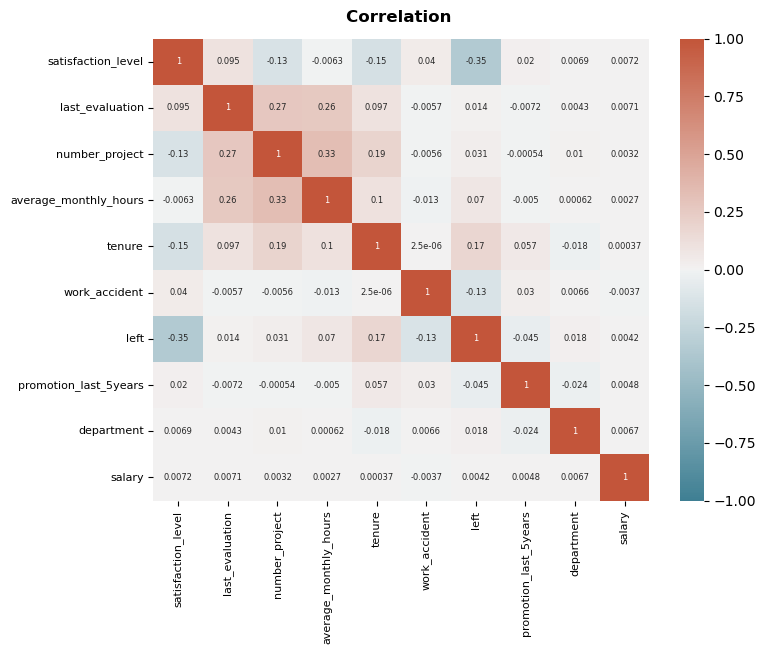

In [50]:
# Plot a correlation heatmap

plt.figure(figsize=(8,6))

heatmap = sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 6}, vmin=-1, vmax=1, 
                      cmap=sns.diverging_palette(220,20, as_cmap=True))
heatmap.set_title('Correlation ', fontweight='bold', fontsize=12, pad=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


* Based on the relationship between variables, it could imply that employees are leaving due to long working hours and number of projects, it seems that these employees are burned out, which could reflect in the employee's satisfaction level.

* Employees who left did not receive promotion in the last 5 years, despite having high evaluation scores.

* An employee who spends more than 6 years in the company tends not to leave, however, there are very few employees who reached this tenure.

<Axes: >

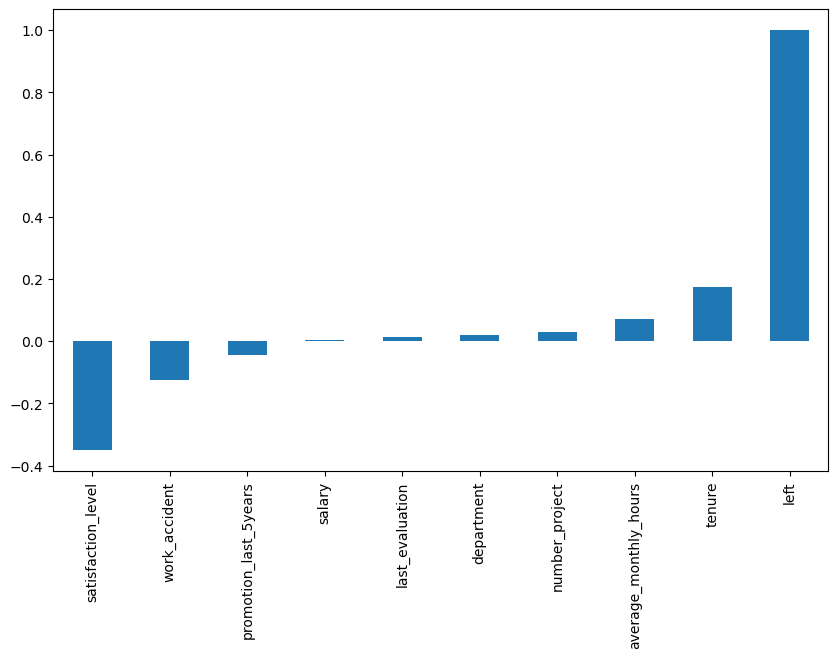

In [51]:
# Bar plot of feature correlations with 'left'

plt.figure(figsize=(10,6))
df.corr()['left'].sort_values(ascending = True).plot(kind='bar')

"left: Its correlation with left is 1, which is natural. It is perfectly correlated with itself.

satisfaction_level:--> It has a negative correlation with left (approximately -0.35). This means that employees with lower satisfaction levels are more likely to leave. This is a strong negative correlation.

work_accident:--> It also has a negative correlation with left, but not as strong (approximately -0.15). This means that employees who have had a work accident are slightly less likely to leave.

promotion_last_5years:--> It also has a negative correlation with left, but a very weak one (approximately -0.05). This means that employees who have received a promotion in the last 5 years are very unlikely to leave.

tenure:--> It has a positive correlation with left (approximately 0.18). This means that employees who have been with the company for a longer time are slightly more likely to leave. This might seem paradoxical, but it could be that after some time, employees seek new challenges.

average_monthly_hours:--> It has a positive correlation with left, but a weak one (approximately 0.08). This means that employees who work longer hours are slightly more likely to leave.

number_project, department, last_evaluation, and salary:--> All of these have a very weak correlation with left, close to 0. This means that these factors have very little or no impact on employees leaving.

Conclusion:

This graph shows that the biggest impact on employees leaving is their satisfaction_level. Employees with lower satisfaction levels are more likely to leave. tenure and average_monthly_hours also have a slight effect, but in the opposite direction. Other factors have very little effect."

### Divide Data into Train and test

In [52]:
#Select features to be used in the model

x=df.drop('left',axis=1)
y=df['left']

In [53]:
# from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42 )

In [54]:
# Print the shape (number of rows and columns) of the training target variable (y_train)

print(y_train.shape)

(8393,)


In [55]:
# Print the distribution of unique values in the training target variable (y_train)

print(y_train.value_counts())

left
0    7005
1    1388
Name: count, dtype: int64


### Synthetic Minority Oversampling Techinique (SMOTE)

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
# Initialize SMOTE with a fixed random state

smote=SMOTE(random_state=42)

In [58]:
# Apply SMOTE to balance the classes by generating synthetic samples for the training data

x_train_somte,y_train_smote=smote.fit_resample(x_train,y_train)

In [59]:
# Print the shape (number of rows and columns) of the resampled target variable (y_train_smote)

print(y_train_smote.shape)

(14010,)


In [60]:
# Print the distribution of unique values in the resampled target variable (y_train_smote)

print(y_train_smote.value_counts())

left
0    7005
1    7005
Name: count, dtype: int64


## Model building

#### LogisticRegression

In [61]:
#from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [62]:
# Train the logistic regression model using the resampled training data (x_train_smote, y_train_smote)

lr.fit(x_train_somte,y_train_smote)

LogisticRegression()

In [63]:
# Make predictions on the test data using the trained logistic regression model

y_pred1=lr.predict(x_test)

In [64]:
# from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.7768204558087827

In [65]:
# from sklearn.metrics import confusion_matrix,classification_report

confusion=confusion_matrix(y_test,y_pred1)
confusion

array([[2311,  684],
       [ 119,  484]], dtype=int64)

In [66]:
# from sklearn.metrics import classification_report

classification=classification_report(y_test,y_pred1)

In [67]:
print(classification)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2995
           1       0.41      0.80      0.55       603

    accuracy                           0.78      3598
   macro avg       0.68      0.79      0.70      3598
weighted avg       0.86      0.78      0.80      3598



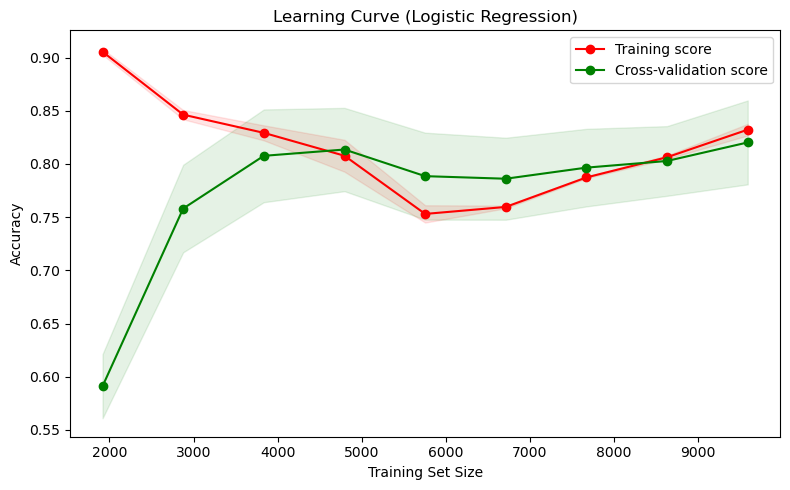

In [68]:
# from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lr, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Add shaded areas for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

This graph shows that the model was overfitting initially, but as the size of the training data increased, the overfitting decreased. In the end, the model is close to being well-fitted, but not completely.

#### Support Vecor Machine (SVM)


In [69]:
# from sklearn.svm import SVC

svm = SVC() 

In [70]:
# Train the Support Vector Machine (SVM) model using the resampled training data (x_train_smote, y_train_smote)

svm.fit(x_train_somte,y_train_smote)

SVC()

In [71]:
# Make predictions on the test data using the trained Support Vector Machine (SVM) model

y_pred4 =svm.predict(x_test)

In [72]:
# from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred4)
accuracy

0.6867704280155642

In [73]:
# from sklearn.metrics import classification_report

classification=classification_report(y_test,y_pred1)

In [74]:
print(classification)

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2995
           1       0.41      0.80      0.55       603

    accuracy                           0.78      3598
   macro avg       0.68      0.79      0.70      3598
weighted avg       0.86      0.78      0.80      3598



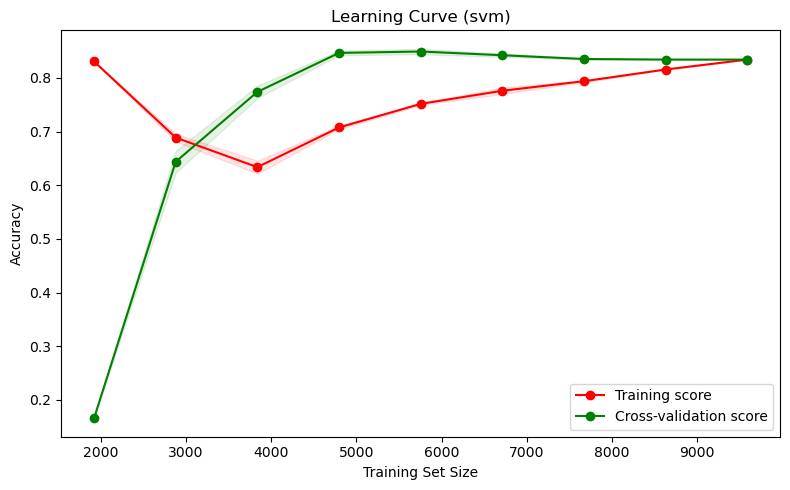

In [75]:
# from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Add shaded areas for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve (svm)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### XG Boost

In [76]:
# from xgboost import XGBClassifier

xg = XGBClassifier()

In [77]:
# Train the XGBoost model using the resampled training data (x_train_smote, y_train_smote)

xg.fit(x_train_somte,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
# Make predictions on the test data using the trained XGBoost model

y_pred3= xg.predict(x_test)

In [79]:
# from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred3)

accuracy

0.9738743746525848

In [80]:
# from sklearn.metrics import confusion_matrix,classification_report

confusion=confusion_matrix(y_test,y_pred3)
confusion

array([[2951,   44],
       [  50,  553]], dtype=int64)

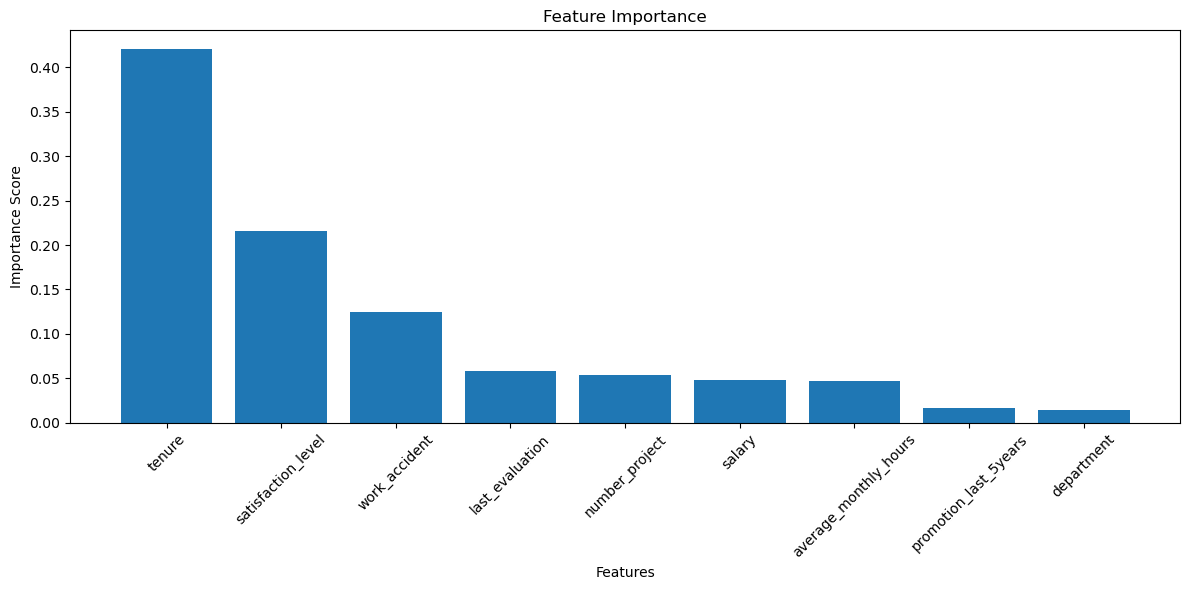

In [81]:
# Feature Importance Plot
importances = xg.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [x.columns[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

Tenure is the most important feature, with an importance score of approximately 0.42. This means that an employee's tenure makes the largest contribution to the model's predictions.

Satisfaction level is the second most important feature, with an importance score of approximately 0.22. An employee's satisfaction level also plays a significant role in the predictions.

Work accident is the third most important feature, with an importance score of approximately 0.12. Experiencing a work accident also influences the predictions.

The other features, such as last_evaluation, number_project, salary, average_monthly_hours, promotion_last_5years, and department have relatively low importance scores, indicating that they contribute less to the predictions.



"This graph shows that employee tenure and satisfaction level are the most important factors for the model. This could mean that these factors play a significant role in predicting employee performance, the likelihood of leaving the job, or other related outcomes."

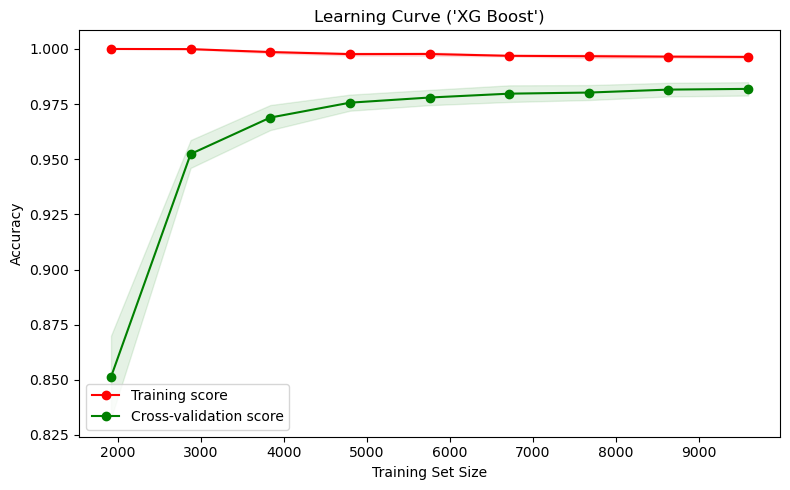

In [82]:
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xg, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Plot the std deviation as a transparent range at each training size
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve ('XG Boost')")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

The model has avoided overfitting and has achieved a good level of accuracy. However, it can also be observed that after approximately 6000 examples, adding more data will not significantly improve performance."


#### RandomForestClassifier # is me kuch kam nhi kar hai hai  ye pura propar ban chu ka hai

In [83]:
#from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [84]:
# Train the Random Forest model using the resampled training data (x_train_smote, y_train_smote)

rf.fit(x_train_somte,y_train_smote)

RandomForestClassifier()

In [85]:
# Make predictions on the test data using the trained Random Forest model

y_pred2=rf.predict(x_test)

In [86]:
# from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred2)

In [87]:
accuracy

0.9752640355753196

In [88]:
# from sklearn.metrics import confusion_matrix,classification_report
confusion=confusion_matrix(y_test,y_pred2)
confusion

array([[2961,   34],
       [  55,  548]], dtype=int64)

<Figure size 800x600 with 0 Axes>

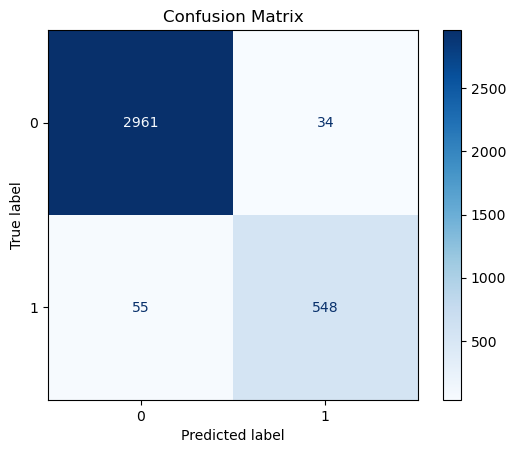

In [89]:
# Confusion Matrix Plot
y_pred2 = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred2, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

The confusion matrix shows that the model is well-suited for this classification task with balanced performance metrics.

There are minimal false positives (32) and false negatives (55), indicating that the model generalizes well to the test data.

In [90]:
# from sklearn.metrics import classification_report
classification=classification_report(y_test,y_pred2)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.94      0.91      0.92       603

    accuracy                           0.98      3598
   macro avg       0.96      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598



The model performs very well with a high accuracy of ~97.58%.

Precision (94.48%) and recall (90.87%) for Class 1 are good, indicating that the model can identify most Class 1 samples with minimal false positives.

The specificity (98.94%) shows that the model is excellent at identifying Class 0 samples correctly.

#### Overfitting/Underfitting Check



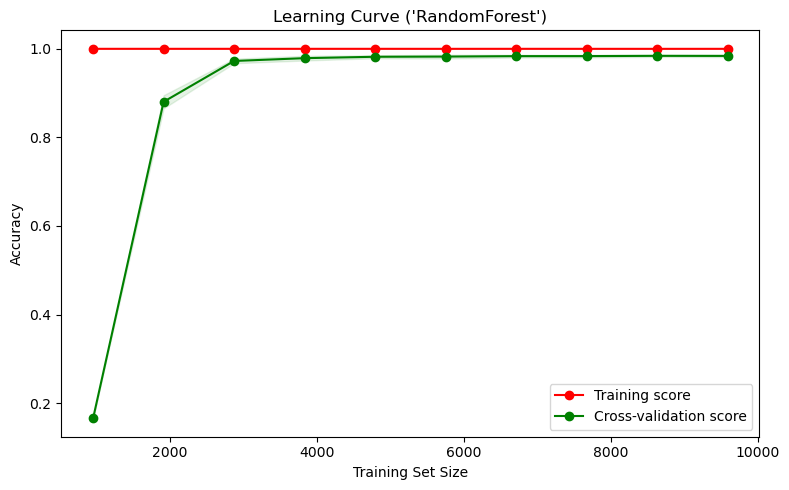

In [91]:
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Plot the std deviation as a transparent range at each training size
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curve ('RandomForest')")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()
plt.show()



No Overfitting: There is no significant gap between the training and validation accuracies.

No Underfitting: The validation accuracy is not low and steadily improves as more data is used.

Balanced Model: The model is well-fitted, performs consistently, and generalizes effectively on unseen data.

This graph demonstrates that the model is robust and suitable for real-world deployment, as it achieves a good balance between training performance and generalization capability.

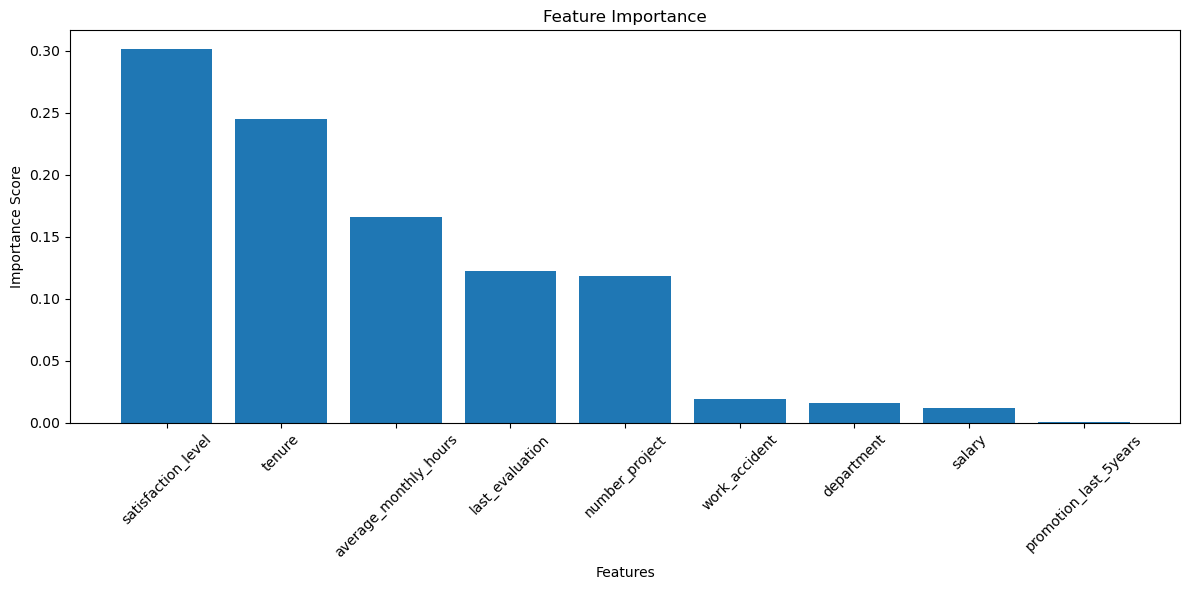

In [92]:
# Feature Importance Plot

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [x.columns[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

satisfaction_level: This feature is the most important, as its bar is the highest. This means that the employee's satisfaction level contributes the most to the model's predictions.

tenure: This is the second most important feature. It indicates how long an employee has been working at the company.

average_monthly_hours: This is the third most important feature. It indicates the average number of hours an employee works per month.

last_evaluation: This is the fourth most important feature. It indicates how the employee's last performance evaluation was.

number_project: This feature is also quite important. It indicates the number of projects the employee is working on.

work_accident: This feature is relatively less important. It indicates whether an employee has had a work accident.

department and salary: These features are even less important.

promotion_last_5years: This feature is the least important.

Conclusion:

This graph clearly shows that the employee's satisfaction level, tenure, average monthly hours, last evaluation, and number of projects are the most important features for the model. Other features, such as work accident, department, salary, and promotion in the last 5 years, are comparatively less important."